### Medicare

#### Medicare is the USA federal government program that provides health care coverage (health insurance) 

* If you are 65+ 
* Under 65 and receiving Social Security Disability Insurance (SSDI) for a certain amount of time
* Under 65 and with End-Stage Renal Disease (ESRD).

#### Who funds  Medicare ?
* The US Hospital Insurance (HI) Trust Fund
* Supplementary Medical Insurance (SMI) Trust Fund

#### What does Medicare pay for?
* Medicare Part A (Hospital Insurance)   benefits , 
    * like inpatient hospital care
    * skilled nursing facility (snf) care 
    * home health care 
    * hospice care
* Medicare Part B like benefits cover certain non-hospital medical expenses like doctors’ office visits,
  * blood test
  * X-rays
  * diabetic screenings and supplies
  * outpatient hospital care.
* Medicare Part D for precription drugs

#### Data Source
* https://data.medicare.gov/

#### Data

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

In [2]:
medicare = pd.read_csv('Medicare Hospital Spending by Claim.csv')

In [3]:
medicare.head()

,Facility Name,Facility ID,State,Period,Claim Type,Avg Spndg Per EP Hospital,Avg Spndg Per EP State,Avg Spndg Per EP National,Percent of Spndg Hospital,Percent of Spndg State,Percent of Spndg National,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,0.06%,01/01/2018,12/31/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,1 to 3 days Prior to Index Hospital Admission,Hospice,2,1,1,0.01%,0.00%,0.00%,01/01/2018,12/31/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,1 to 3 days Prior to Index Hospital Admission,Inpatient,6,7,7,0.03%,0.04%,0.03%,01/01/2018,12/31/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,1 to 3 days Prior to Index Hospital Admission,Outpatient,219,108,152,0.95%,0.52%,0.70%,01/01/2018,12/31/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,1 to 3 days Prior to Index Hospital Admission,Skilled Nursing Facility,1,2,2,0.00%,0.01%,0.01%,01/01/2018,12/31/2018


#### Problem Statement Created by looking at the data
* How much is spent over Inpatient and Outpatient services by the state , nation and hospital
* Statewise spending done on Nursing facility
* Analysis of spending done for medical facilities
* For which period is the spending done more 
* Comparison of spending done for Inpatient VS Spending for Outpatient
* Grouping the spending into buckets which will tell us which medical facility belongs to which bucket (need to look into it)

These problem statements can help Medicare people to get an idea about how the spending is happening

#### Data description

In [4]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67826 entries, 0 to 67825
Data columns (total 13 columns):
Facility Name                67826 non-null object
Facility ID                  67826 non-null int64
State                        67826 non-null object
Period                       67826 non-null object
Claim Type                   67826 non-null object
Avg Spndg Per EP Hospital    67826 non-null int64
Avg Spndg Per EP State       67826 non-null int64
Avg Spndg Per EP National    67826 non-null int64
Percent of Spndg Hospital    67826 non-null object
Percent of Spndg State       67826 non-null object
Percent of Spndg National    67826 non-null object
Start Date                   67826 non-null object
End Date                     67826 non-null object
dtypes: int64(4), object(9)
memory usage: 6.7+ MB


In [5]:
medicare.describe()

,Facility ID,Avg Spndg Per EP Hospital,Avg Spndg Per EP State,Avg Spndg Per EP National
count,67826.000000,67826.000000,67826.000000,67826.000000
mean,260615.397665,1823.576682,1970.594448,1967.909091
std,161163.032969,4571.752066,4833.027866,4816.227247
min,10001.000000,0.000000,0.000000,0.000000
25%,110076.000000,0.000000,2.000000,2.000000
50%,250104.000000,68.000000,98.000000,119.000000
75%,390117.000000,1012.000000,1174.000000,1174.000000
max,670122.000000,41637.000000,23343.000000,21646.000000


##### There are no null values

#### What are the different claim periods  that we have in our data?

In [6]:
medicare['Period'].value_counts()

1 through 30 days After Discharge from Index Hospital Admission    21581
During Index Hospital Admission                                    21581
1 to 3 days Prior to Index Hospital Admission                      21581
Complete Episode                                                    3083
Name: Period, dtype: int64

#### Let's give the claim periods some easy names

In [7]:
def changing_period_names(previous_name):
    if previous_name == '1 through 30 days After Discharge from Index Hospital Admission':
        return 'After Discharge'
    elif previous_name == 'During Index Hospital Admission':
        return 'During Hospital Admission'
    elif previous_name =='1 to 3 days Prior to Index Hospital Admission':
        return 'Prior Hospital Admission'
    elif previous_name == 'Complete Episode':
        return 'Overall'
    
medicare['Period'] = medicare['Period'].map(changing_period_names)

In [8]:
medicare['Period'].value_counts()

Prior Hospital Admission     21581
During Hospital Admission    21581
After Discharge              21581
Overall                       3083
Name: Period, dtype: int64

#### What kind of claims do we have for medicare?

In [9]:
medicare['Claim Type'].value_counts()

Inpatient                    9249
Carrier                      9249
Durable Medical Equipment    9249
Skilled Nursing Facility     9249
Outpatient                   9249
Hospice                      9249
Home Health Agency           9249
Total                        3083
Name: Claim Type, dtype: int64

#### Excatly how many Facilty centers are we having in our data for medicare

In [10]:
medicare['Facility ID'].nunique()

3083

#### Percent spnding hospital, Percent of Spndg State, Percent of Spndg National should be in a numerical format

In [11]:
import re
#Removing the % symbol
medicare['Percent of Spndg Hospital'] = medicare['Percent of Spndg Hospital'].apply(lambda x: re.sub('%', '', x))
medicare['Percent of Spndg State'] = medicare['Percent of Spndg State'].apply(lambda x: re.sub('%', '', x))
medicare['Percent of Spndg National'] = medicare['Percent of Spndg National'].apply(lambda x: re.sub('%', '', x))

In [12]:
#Converting into float
medicare['Percent of Spndg Hospital'] = medicare['Percent of Spndg Hospital'].apply(lambda x: float(x))
medicare['Percent of Spndg State'] = medicare['Percent of Spndg State'].apply(lambda x: float(x))
medicare['Percent of Spndg National'] = medicare['Percent of Spndg National'].apply(lambda x: float(x))

In [13]:
south_alabama = medicare[(medicare['Facility Name'] == 'SOUTHEAST ALABAMA MEDICAL CENTER') &(medicare['Claim Type'] != 'Total')]

#### State wise cost for Avg Spndg Per EP Hospital for all the claim types

In [14]:
#Since we are looking for all claim types, the claim type will be total
total = medicare[(medicare['Claim Type'] == 'Total')]

In [15]:
#We are dropping the start date and end date as we dont need it.
total.drop(columns = ['Start Date','End Date'], inplace = True)

C:\Users\Chaitali\Important\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
#The total number of states that we have
total['State'].nunique()

50

In [17]:
All_States = total['State'].unique()

In [18]:
#These are all the states
print(All_States)

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [19]:
def data_avg_spend_hospital_statewise(df):
    avg_per_hospital = [] #Captures sum of the avg spending for EACH state e.g for AL = 12000 for AK = 12333
    
    total_avg_spend_hospital = df.agg({'Avg Spndg Per EP Hospital':sum})[0]#Captures sum of the avg spending for ALL state
   
    all_states = df['State'].unique()
    
    for i in all_states:
        state_value = df[(df['State'] == i)].agg({'Avg Spndg Per EP Hospital':sum})[0]
        average = (state_value/total_avg_spend_hospital) *100
        avg_per_hospital.append(average)
        average = 0
    
    new_dataframe = pd.DataFrame(list(zip(all_states, avg_per_hospital )),columns  = ['State','Spending'],index = [all_states])
    return new_dataframe

In [20]:
Statewise_Hosital = data_avg_spend_hospital_statewise(total)

#### Lets see the top 10 states where hospital wise spending is more

In [21]:
top_ten = Statewise_Hosital.sort_values('Spending',ascending=False).head(n = 10)

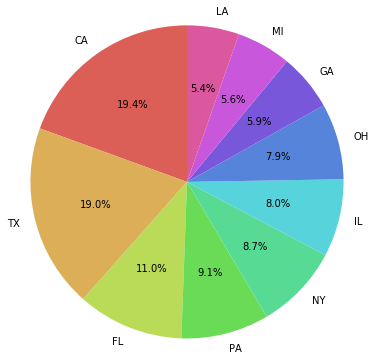

In [22]:
l= top_ten['State']
sizes = top_ten['Spending']
fig1, ax1 = plt.subplots()
color_set = sns.color_palette("hls", 10)
ax1.pie(sizes,labels=l, autopct='%1.1f%%',startangle = 90,  colors = color_set, radius = 1.8)
plt.show()

#### How much is spent over Inpatient and Outpatient services by the state , nation and hospital

In [23]:
inpatient_cost = medicare[medicare['Claim Type'] == 'Inpatient']

In [24]:
outpatient_cost = medicare[medicare['Claim Type'] == 'Outpatient']

In [25]:
inpatient_cost.drop(columns = ['Facility ID','Start Date', 'End Date','Percent of Spndg Hospital','Percent of Spndg State','Percent of Spndg National'],inplace = True)

In [26]:
outpatient_cost.drop(columns = ['Facility ID','Start Date', 'End Date','Percent of Spndg Hospital','Percent of Spndg State','Percent of Spndg National'],inplace = True)

In [27]:
inpatient_state = pd.pivot_table(inpatient_cost,index=["State"])

In [28]:
outpatient_state = pd.pivot_table(outpatient_cost,index=["State"])

In [29]:
in_spending = inpatient_state.sort_values(by=['Avg Spndg Per EP Hospital','Avg Spndg Per EP State'], ascending = False)[:10]

In [30]:
out_spending = outpatient_state.sort_values(by=['Avg Spndg Per EP Hospital','Avg Spndg Per EP State'], ascending = False)[:10]

In [31]:
in_spending

,Avg Spndg Per EP Hospital,Avg Spndg Per EP National,Avg Spndg Per EP State
State,,,
DC,4870.777778,4334.333333,4649.000000
NV,4675.015152,4334.333333,4978.000000
NE,4596.942029,4334.333333,4419.333333
TX,4508.603865,4334.333333,4843.666667
LA,4434.678862,4334.333333,4764.000000
CO,4402.644928,4334.333333,4601.000000
ID,4365.523810,4334.333333,4410.333333
AZ,4276.471264,4334.333333,4640.000000
CA,4160.711963,4334.333333,4353.333333


In [102]:
in_spending_top_ten = pd.DataFrame(in_spending.to_records())

##### National level costs are similar as this is for one nation i.e USA

In [141]:
# in_spending.drop(columns = ['Avg Spndg Per EP National']).plot(kind = 'bar', figsize = (10,5) , title = 'Inpatient Spending at Hospital, State Level', colormap = 'Set1',
#              width = 0.65)
# plt.legend(bbox_to_anchor=(1.3, 1.05))


fig = px.bar(in_spending_top_ten,x = 'State', y=['Avg Spndg Per EP State','Avg Spndg Per EP Hospital'], title = 'Inpatient Spending w.r.t State and Hospital(top 10)',
            color_discrete_map={
                "Avg Spndg Per EP State": "bisque",
                "Avg Spndg Per EP Hospital": "tan"})
fig.show()

In [33]:
out_spending 

,Avg Spndg Per EP Hospital,Avg Spndg Per EP National,Avg Spndg Per EP State
State,,,
ND,556.047619,335.666667,617.333333
SD,467.875000,335.666667,617.333333
MT,448.307692,335.666667,510.333333
DC,391.444444,335.666667,337.333333
ID,388.333333,335.666667,450.333333
IA,388.313725,335.666667,446.333333
WI,380.328042,335.666667,439.333333
MN,378.546099,335.666667,470.333333
ME,370.705882,335.666667,425.333333


In [122]:
out_spending_top_ten = pd.DataFrame(out_spending.to_records())

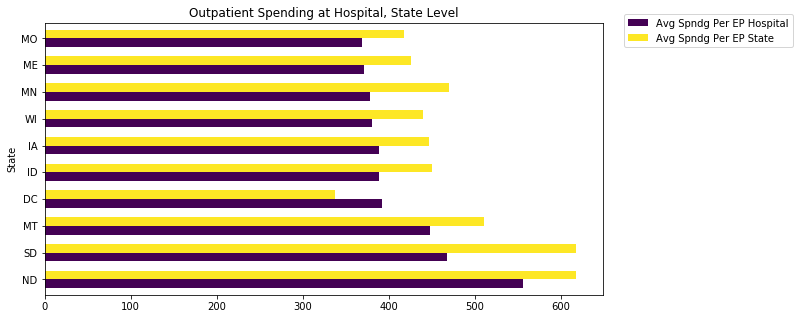

In [140]:
out_spending.drop(columns = ['Avg Spndg Per EP National']).plot(kind = 'barh', figsize = (10,5) , title = 'Outpatient Spending at Hospital, State Level', colormap = 'viridis',
             width = 0.65)
plt.legend(bbox_to_anchor=(1.35, 1.05))
# fig = px.bar(out_spending_top_ten,x = 'State', y=['Avg Spndg Per EP State','Avg Spndg Per EP Hospital'], title = 'Outpatient Spending w.r.t State and Hospital(top 10)',
#         color_discrete_map={
#                 "Avg Spndg Per EP State": "bisque",
#                 "Avg Spndg Per EP Hospital": "tan"})
# fig.show()


#### Statewise spending done on Nursing Facility

In [50]:
nursing = medicare[medicare['Claim Type'] == 'Skilled Nursing Facility']

In [53]:
nursing.drop(columns = ['Facility ID','Start Date','End Date','Facility Name'],inplace = True)

C:\Users\Chaitali\Important\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
nursing.head()

,State,Period,Claim Type,Avg Spndg Per EP Hospital,Avg Spndg Per EP State,Avg Spndg Per EP National,Percent of Spndg Hospital,Percent of Spndg State,Percent of Spndg National
4,AL,Prior Hospital Admission,Skilled Nursing Facility,1,2,2,0.00,0.01,0.01
11,AL,During Hospital Admission,Skilled Nursing Facility,0,0,0,0.00,0.00,0.00
18,AL,After Discharge,Skilled Nursing Facility,2404,2630,3228,10.48,12.66,14.91
26,AL,Prior Hospital Admission,Skilled Nursing Facility,1,2,2,0.01,0.01,0.01
33,AL,During Hospital Admission,Skilled Nursing Facility,0,0,0,0.00,0.00,0.00


In [55]:
nursing.Period.value_counts()

After Discharge              3083
Prior Hospital Admission     3083
During Hospital Admission    3083
Name: Period, dtype: int64

In [62]:
skilled_nursing_pivot = pd.pivot_table(nursing, index = 'State')

In [85]:
skilled_nursing_pivot_top_ten = skilled_nursing_pivot.sort_values(by = 'Avg Spndg Per EP State', ascending = False)[:10]

In [86]:
#Converting pivot table into dataframe
skilled_nursing_pivot_top_ten = pd.DataFrame(skilled_nursing_pivot_top_ten.to_records())

In [101]:
fig = px.bar(skilled_nursing_pivot_top_ten,x = 'State', y='Avg Spndg Per EP State')
fig.show()

In [135]:
medical_facility_center = pd.pivot_table(medicare.drop(columns = ['Facility ID','Percent of Spndg Hospital','Percent of Spndg National','Avg Spndg Per EP National','Percent of Spndg State']), index = 'Facility Name')

####  Spending with respect to Medical Facility

In [138]:
medical_facility_center.sort_values(by =['Avg Spndg Per EP State','Avg Spndg Per EP Hospital'], ascending = False)

,Avg Spndg Per EP Hospital,Avg Spndg Per EP State
Facility Name,,
NORTHWEST HILLS SURGICAL HOSPITAL,3405.090909,2122.181818
DALLAS MEDICAL CENTER,2894.409091,2122.181818
BAYLOR SCOTT & WHITE THE HEART HOSPITAL - PLANO,2824.409091,2122.181818
U.T. SOUTHWESTERN UNIVERSITY HOSPITAL - ZALE LIPSHY,2792.000000,2122.181818
BAYLOR MEDICAL CENTER AT TROPHY CLUB,2713.454545,2122.181818
BAYLOR SURGICAL HOSPITAL AT LAS COLINAS,2700.863636,2122.181818
BAYLOR SCOTT AND WHITE SURGICAL HOSPITAL FORTWORTH,2684.954545,2122.181818
MEMORIAL HERMANN - TEXAS MEDICAL CENTER,2665.636364,2122.181818
DELL SETON MED CENTER AT THE UNIVERSITY OF TX,2629.681818,2122.181818


#### For which period is the spending done more

In [142]:
pd.pivot_table(medicare, index = 'Period')

,Avg Spndg Per EP Hospital,Avg Spndg Per EP National,Avg Spndg Per EP State,Facility ID,Percent of Spndg Hospital,Percent of Spndg National,Percent of Spndg State
Period,,,,,,,
After Discharge,1238.914925,1311.000000,1307.873407,260615.397665,6.201224,6.055714,6.025435
During Hospital Admission,1530.021686,1671.857143,1677.879709,260615.397665,7.602415,7.724286,7.747714
Overall,20059.366202,21646.000000,21676.427506,260615.397665,100.000000,100.000000,100.000000
Prior Hospital Admission,96.680645,109.714286,110.911218,260615.397665,0.481991,0.505714,0.512139


In [146]:
fp =r'C:\Users\Chaitali\Desktop\Python\Project\tl_2017_us_state\tl_2017_us_state.shp'

In [147]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'